In [1]:
!pip install ultralytics
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.4/799.4 kB 22.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 3.8 MB/s eta 0:00:00


# Install Yolo

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.50 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5689.3/8062.4 GB disk)


# Import data from robo flow 

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wrNmIilZnQ3q9s6VsVxd")
project = rf.workspace("kenyan-coins-data").project("openvission")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 33.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.2.1 requires jupyter-lsp>=2.0.0, but you h


Extracting Dataset Version Zip to Openvission-1 in yolov8:: 100%|██████████| 308/308 [00:00<00:00, 5948.55it/s]


# Configure the direction path for training data

In [4]:
import yaml

# Load the YAML file
with open('/kaggle/working/Openvission-1/data.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Print the current content
print(config)

{'names': ['Ksh 1', 'Ksh 10', 'Ksh 20', 'Ksh 5'], 'nc': 4, 'roboflow': {'license': 'CC BY 4.0', 'project': 'openvission', 'url': 'https://universe.roboflow.com/kenyan-coins-data/openvission/dataset/1', 'version': 1, 'workspace': 'kenyan-coins-data'}, 'test': '../test/images', 'train': 'Openvission-1/train/images', 'val': 'Openvission-1/valid/images'}


In [5]:
# Make changes to the configuration
config['test'] ='/kaggle/working/Openvission-1/test/images'
config['train']='/kaggle/working/Openvission-1/valid/images'
config['val'] ='/kaggle/working/Openvission-1/train/images'
# Save the changes back to the YAML file
with open('/kaggle/working/Openvission-1/data.yaml', 'w') as file:
    yaml.safe_dump(config, file)

# Train the model

In [10]:
# Train YOLOv8n on COCO8 for 3 epochs
!yolo task=detect mode=train model=yolov8n.pt data=/kaggle/working/Openvission-1/data.yaml epochs=200 imgsz=640

100%|███████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 122MB/s]
Ultralytics YOLOv8.2.50 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/Openvission-1/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

# Display the results From the model

In [11]:
import os
from IPython.display import display,Image
from IPython import display
display.clear_output()

# Confusion matrix

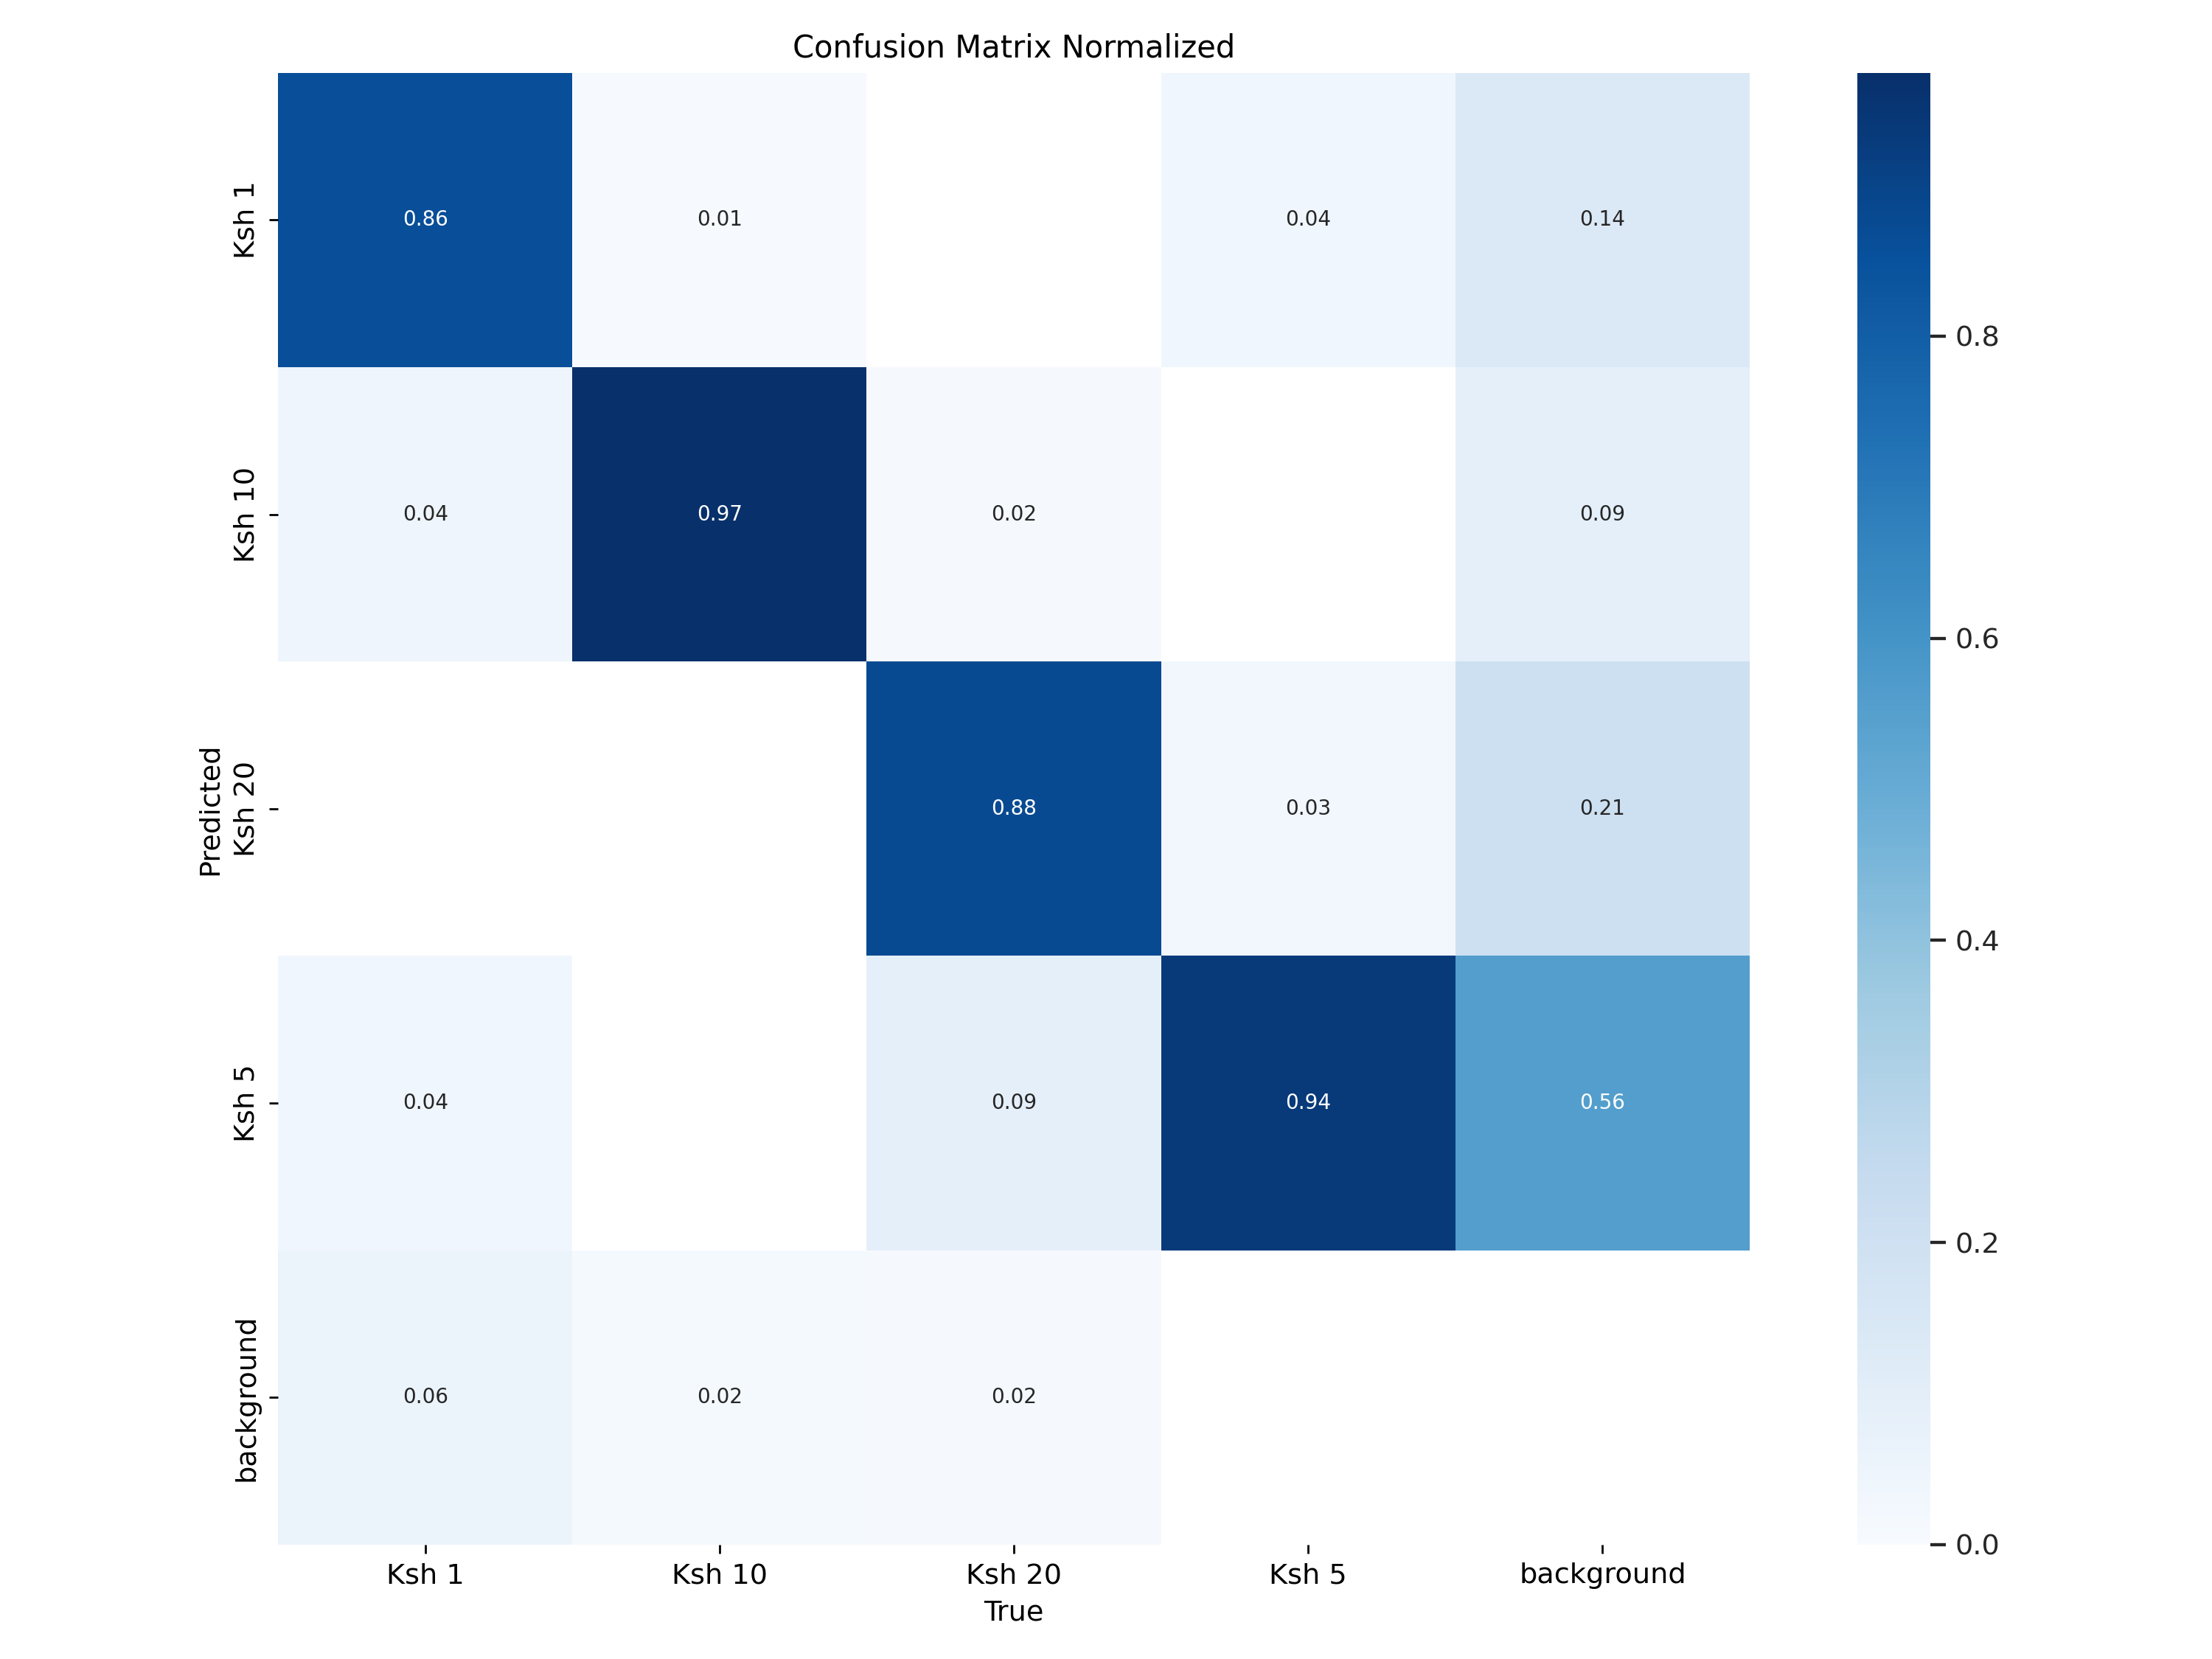

In [12]:
Image(filename= f'/kaggle/working/runs/detect/train/confusion_matrix_normalized.png', width=600)

# Train results

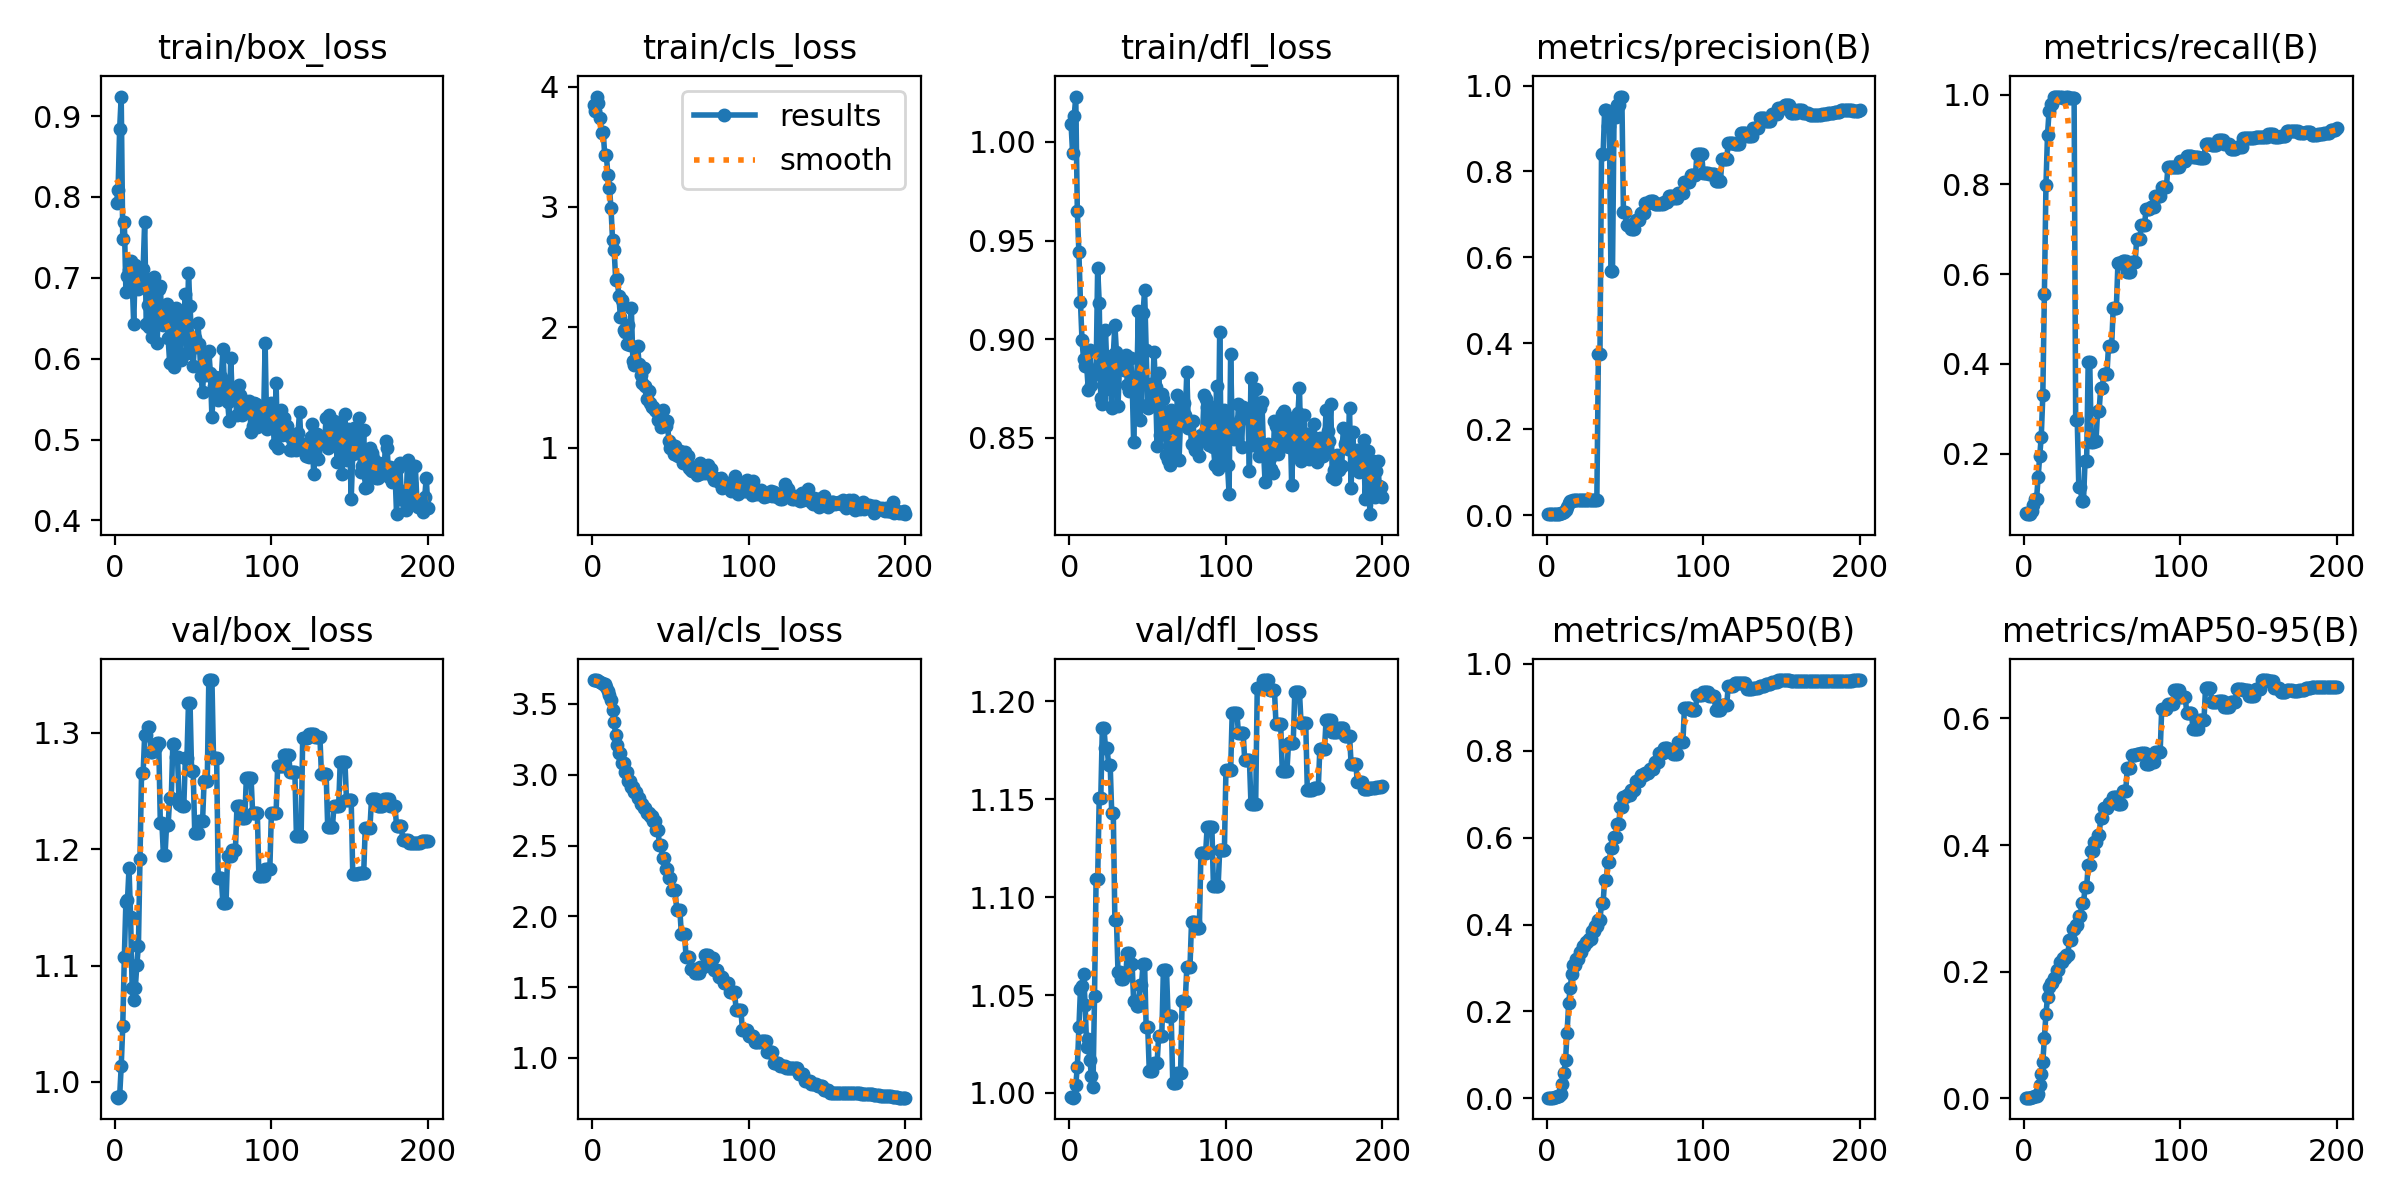

In [13]:
Image(filename=f'/kaggle/working/runs/detect/train/results.png', width=600)

# Take a look at the validation 

In [14]:
!yolo task= detect mode=val model=/kaggle/working/runs/detect/train/weights/best.pt data= /kaggle/working/Openvission-1/data.yaml

Ultralytics YOLOv8.2.50 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/working/Openvission-1/train/labels.cache... 129 images, 0 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        129       1248      0.954      0.906      0.962      0.661
                 Ksh 1        120        249      0.978      0.843       0.97      0.665
                Ksh 10        129        582      0.984      0.967      0.986      0.689
                Ksh 20        114        198      0.978      0.886      0.955      0.663
                 Ksh 5        111        219      0.876      0.927      0.938      0.628
Speed: 2.1ms preprocess, 2.9ms inference, 0.0ms loss, 24.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# Take a look at the predition mode

In [24]:
!yolo task= detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.5  source= /kaggle/working/Openvission-1/test/images

Ultralytics YOLOv8.2.50 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3006428 parameters, 0 gradients, 8.1 GFLOPs

image 1/6 /kaggle/working/Openvission-1/test/images/20240703_153013_jpg.rf.2628ebf753c8e19da6f721f7c4cbcebf.jpg: 640x640 1 Ksh 1, 5 Ksh 10s, 2 Ksh 20s, 1 Ksh 5, 8.2ms
image 2/6 /kaggle/working/Openvission-1/test/images/20240703_153102_jpg.rf.e07eab593148ed918e7620e0184ec914.jpg: 640x640 5 Ksh 10s, 2 Ksh 20s, 2 Ksh 5s, 6.8ms
image 3/6 /kaggle/working/Openvission-1/test/images/20240703_153222_jpg.rf.e1e8a99ce039efc6af0ae12699dea741.jpg: 640x640 6 Ksh 10s, 2 Ksh 20s, 2 Ksh 5s, 8.0ms
image 4/6 /kaggle/working/Openvission-1/test/images/20240703_153719_jpg.rf.6eb96f1a13eb113bf17a97ae9af4f217.jpg: 640x640 4 Ksh 10s, 1 Ksh 5, 6.6ms
image 5/6 /kaggle/working/Openvission-1/test/images/20240703_153741_jpg.rf.564a0ea4e1bff2c765b8db20c5348d87.jpg: 640x640 1 Ksh 1, 7 Ksh 10s, 2 Ksh 20s, 2 Ksh 5s, 6.3ms
image 6/6 /kaggle/working/O

# Use a for loop to show the predicted images 

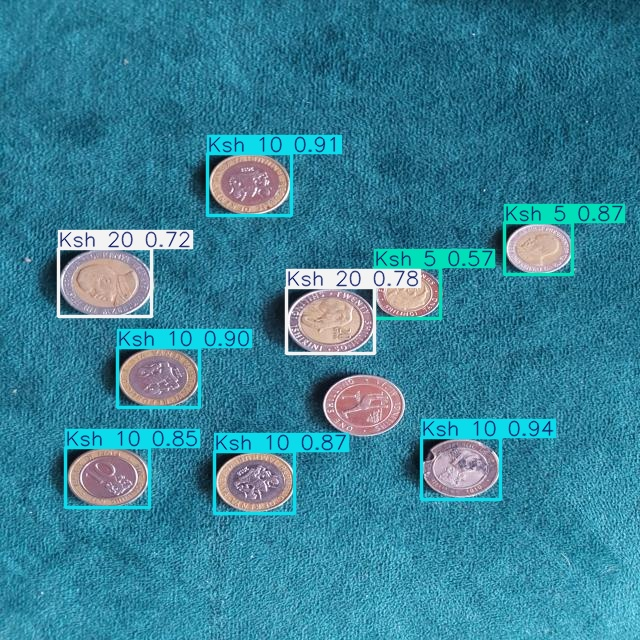

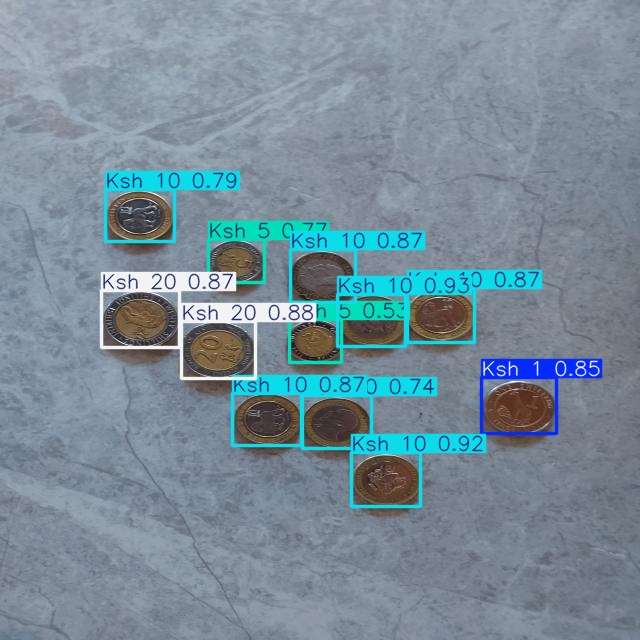

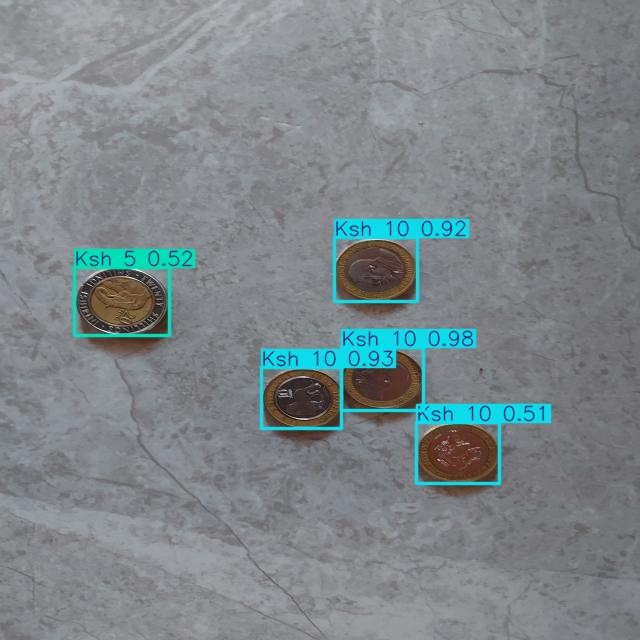

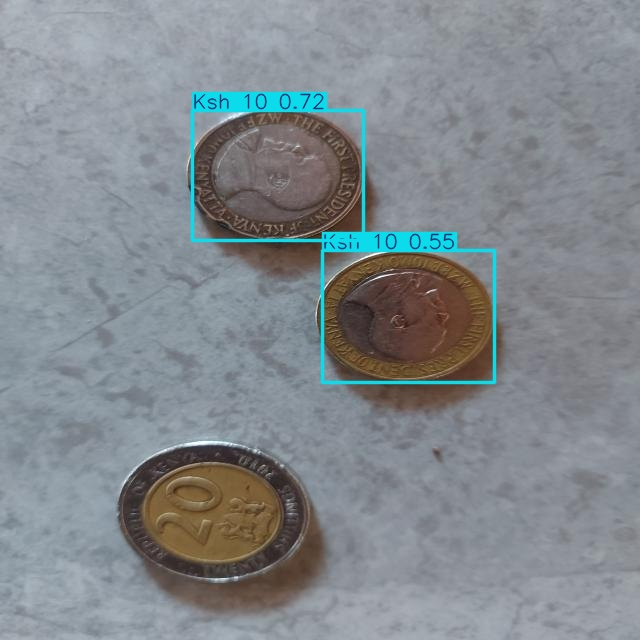

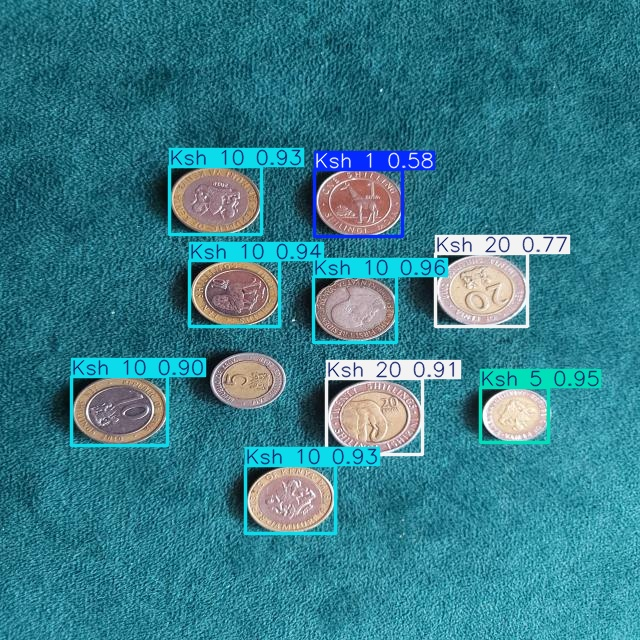

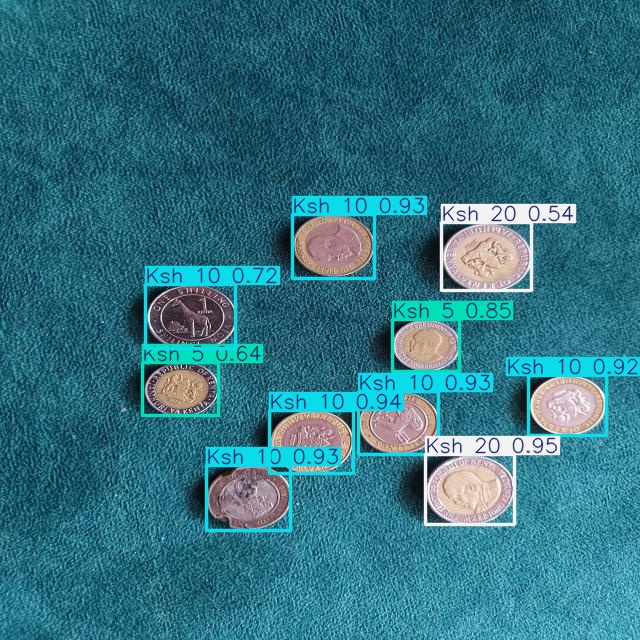

In [25]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/kaggle/working/runs/detect/predict/*.jpg'):
    display(Image(filename=image_path,height=600))
    print('\n')

## Dectect objetcs